In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [17]:
city_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []

for x in range(len(cities)):
    url = "http://api.openweathermap.org/data/2.5/weather?APPID=b42e36f121e14d8c1a83dac93074158c&q="
    print(f"Making request number: {x} for ID: {cities[x]}")

    weather_response = requests.get(url + str(cities[x]))
    weather_data = weather_response.json()
    
    if weather_response:
        print('Success!')
        city_list.append(weather_data["name"])
        lat_list.append(weather_data["coord"]["lat"])
        temp_list.append(weather_data["main"]["temp"])
        humidity_list.append(weather_data["main"]["humidity"])
        clouds_list.append(weather_data["clouds"]["all"])
        wind_list.append(weather_data["wind"]["speed"])
    else:
        print('City not found.')

Making request number: 0 for ID: pevek
Success!
Making request number: 1 for ID: tuktoyaktuk
Success!
Making request number: 2 for ID: iqaluit
Success!
Making request number: 3 for ID: ushuaia
Success!
Making request number: 4 for ID: kapaa
Success!
Making request number: 5 for ID: illoqqortoormiut
City not found.
Making request number: 6 for ID: pastavy
Success!
Making request number: 7 for ID: sheridan
Success!
Making request number: 8 for ID: attawapiskat
City not found.
Making request number: 9 for ID: taolanaro
City not found.
Making request number: 10 for ID: pochutla
Success!
Making request number: 11 for ID: chokurdakh
Success!
Making request number: 12 for ID: vaini
Success!
Making request number: 13 for ID: wyszkow
Success!
Making request number: 14 for ID: harper
Success!
Making request number: 15 for ID: nanortalik
Success!
Making request number: 16 for ID: sulangan
Success!
Making request number: 17 for ID: punta arenas
Success!
Making request number: 18 for ID: qaanaaq
Su

In [18]:
weather_dict = {"City": city_list, "Latitude": lat_list, "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list, "Wind Speed": wind_list}
df = pd.DataFrame(weather_dict)
df.head()

export_csv = df.to_csv("weather.csv", index = None, header = True)

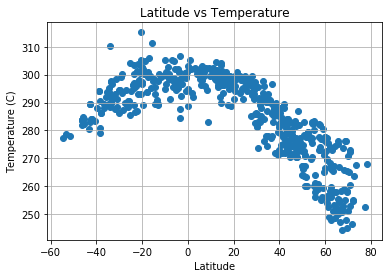

In [19]:
plt.scatter(weather_dict["Latitude"], weather_dict["Temperature"], marker = "o")
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatTemp.png")
plt.show()

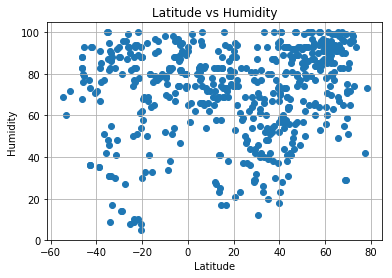

In [20]:
plt.scatter(weather_dict["Latitude"], weather_dict["Humidity"], marker = "o")
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatHumid.png")
plt.show()

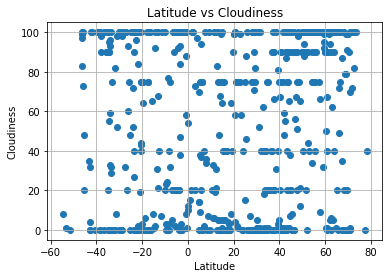

In [21]:
plt.scatter(weather_dict["Latitude"], weather_dict["Clouds"], marker = "o")
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatCloud.png")
plt.show()

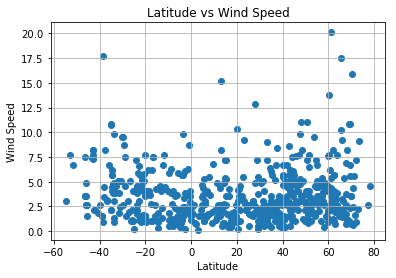

In [22]:
plt.scatter(weather_dict["Latitude"], weather_dict["Wind Speed"], marker = "o")
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatWind.png")
plt.show()

In [23]:
1: There is a clear pattern with regards to temperature and latitude where the highest temperatures are closest to the equator (0 latitude).
2: Cloudiness is fairly evenly scattered across latitude with no easily discernable trends.
3: Humidity tends to stay above 60 for most locations but is more likely to have lower values just above and below the equator.

SyntaxError: invalid syntax (<ipython-input-23-808948e07b72>, line 1)